## 15.12 Common pitfalls

### 15.12.1 Perfect separation

Perfect separation happens when the outcome can be directly predicted from one of the predictor variables. For example, let say that we model an outcome $Y$ using one explanatory standard gaussian variable $X_1$ and that $Y$ is such that $Y=0$ whenever $X_1\leq0$ and $Y=1$ whenever $X1>0$.

In [22]:
x1 <- rnorm(1000, 0, 1)
y <- (x1 <= 0)*1

data_sep <- data.frame(y,x1)

Let us try to estimate this logistic regression model

In [23]:
model_sep <- glm(y ~ x1, data = data_sep, family = binomial(link="logit"))

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

`R` detects the perfect separation and prompts an error that states that `fitted probabilities numerically 0 or 1 occured`. The reason of this error is that, due to the perfect separation, the maximum likelihood of the parameter $\beta_1$ for the variable $X_1$ can not be estimated as its value is actually infinite thus leading to the prompted error. There exists some options to consider when facing this issue among which:

* removing the problematic variable from the model
* setting $\beta_1$ at an arbitrary high value and estimate the model
* changing the model or manipulating the data

Note that, in practice, perfect separation is not very likely to happen. However, *quasi_perfect* separation is totally possible and needs to be tackled. For more details about how to handle separation, one can read the following articles:

> *Heinze, G., & Schemper, M. (2002). A solution to the problem of separation in logistic regression. Statistics in Medicine* 
>   
> *Firth, D. (1993). Bias Reduction of Maximum Likelihood Estimates. Biometrika*

### 15.12.2 Low events per variable

A common issue when estimating logistic regression model is the problem of the ratio between the number of events and the number of predictive variables. This ratio is known as *Events Per Variable* When this ratio is low, it can lead to biased estimation and model with poor predictive abilities.

If the biomedical literature, the so-called *ten events per variable rule* is commonly used. However, we emphasize here the absence of theoretical justification and even the lack of actual evidence that this rule gives good results. If you want more information about the issues raised by this commonly used rule, you can read the following article:

> *Smeden, M., de Groot, J.A., Moons, K.G. et al. (2016) No rationale for 1 variable per 10 events criterion for binary logistic regression analysis. BMC Med Res Methodol*.


### 15.12.3 Influential values

Another aspect to take into account when estimating a logistic regression model is the presence of influential values among the observations which, as their names indicates, might have a huge impact on the estimation of the model. The Cook's distance is a useful measure to assess how influential an observation is. It measures how much the outcome would be modifier by removing this observation from the data.

In, `R`, the Cook's distance can be easily plotted and directly plotted by specifying `which = 4` as an argument to the `plot` function.

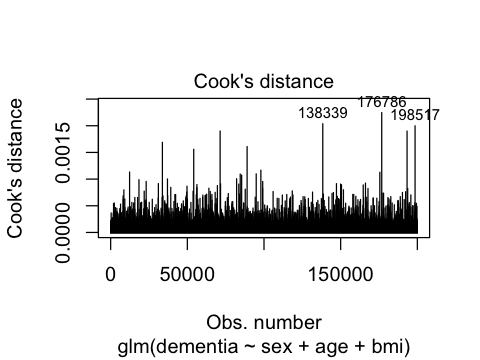

In [24]:
plot(dementia2, which = 4)

As you can see from the above example, some observations seems to have higher influence than the other. However, if we look at the y-axis scale, this difference is not huge. It is important to be careful when using this plot for several reasons. As we have seen, the scale of the y-axis can have a very reduced range. Also, if some outliers seems to be identified, additional analysis should be performed for these apparent outliers before ruling them as actual influential values. If they happen to be, one of the solution is to remove them from the data.

### 15.12.4 Multicolinearity

Multicolinearity arises when one or several predictor variables can be described as a linear combination of a set of other predictor variables. In the case of perfect multicolinearity, the model becomes unidentifiable meaning that there no unique set of parameters can be found.

In [25]:
x1 <- rnorm(1000, 0, 1)
x2 <- rnorm(1000, 0, 1)
x3 <- rnorm(1000, 0, 1)
x4 <- x1 + x2
prob = exp(x1 + x2 + x3 + x4)/(1+exp(x1 + x2 + x3 + x4))
y <- rbinom(1, 1000, prob)

data_multicol <- data.frame(y,x1,x2,x3,x4)
model_multicol <- glm(y ~ x1 + x2 + x3 + x4, data = data_sep, family = binomial(link="logit"))

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

We obtain the same error message that we got in the *perfect separation* case which makes sense as both issues leads to unidentifiable model and the impossibility of converging towards a unique solution. In less severe cases of multicolinearity, the model estimation sometimes converge but some parameters estimate might be biased and their standard error estimates can have high values meaning that there is a lot of uncertainty on their actual values.

There exist several measures of the interrelationship between the predictor variables. Two of the most commonly used are the *tolerance* and the *variance inflation factor* (VIF). The tolerance is defined as $1-R^2_j$ where $R^2_j$ is the $R^2$ of the regression of the covariate $X_j$ on all other covariates and informs and the VIF is defined as the reciprocal of the tolerance. Tolerance ranges between $0$ and $1$ and a low tolerance is an indicator of a multicolinearity issue. As a consequence, a high VIF also is an indicator of a multicolinearity issue. As every such indicator, several rules of thumb are being used by scientists for these indicators as the following article describes.

> O’brien, R. M. (2007). A Caution Regarding Rules of Thumb for Variance Inflation Factors. Quality & Quantity

The VIF can be computed in `R` using the function `vif` from the `car` package.

In [26]:
install.packages("car", repos='http://cran.us.r-project.org')
library(car)

also installing the dependencies ‘openxlsx’, ‘rio’

Warning message in install.packages("car", repos = "http://cran.us.r-project.org"):
“installation of package ‘openxlsx’ had non-zero exit status”Warning message in install.packages("car", repos = "http://cran.us.r-project.org"):
“installation of package ‘rio’ had non-zero exit status”Warning message in install.packages("car", repos = "http://cran.us.r-project.org"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(car): there is no package called ‘car’


In [ ]:
vif(model_multicol)

When multicolinearity arises, different options might be considered. A first is to remove from the covariates highly correlated ones, i.e. those with high VIF. A second option is to proceed to a dimensionality reduction approach as a preliminary step.